In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Components.loadDataset import loadDataset as ld
from Components.Models import Models as md 
from MAEModify.error import calc_mae

2025-11-09 17:03:08.032273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762718588.048947   14306 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762718588.054044   14306 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-09 17:03:08.071966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidge


████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [2]:
#Carrega o dataset physionet
physionet2012_dataset = ld.load_dataset_pypots_modify("physionet_2012", "all", 0.1)

2025-11-09 17:03:19 [INFO]: Have set the random seed as 2022 for numpy and pytorch.
2025-11-09 17:03:19 [INFO]: You're using dataset physionet_2012, please cite it properly in your work. You can find its reference information at the below link: 
https://github.com/WenjieDu/TSDB/tree/main/dataset_profiles/physionet_2012
2025-11-09 17:03:19 [INFO]: Dataset physionet_2012 has already been downloaded. Processing directly...
2025-11-09 17:03:19 [INFO]: Dataset physionet_2012 has already been cached. Loading from cache directly...
2025-11-09 17:03:20 [INFO]: Loaded successfully!
/data/victor/missingdata/pypotsModify/benchpotsMAE/datasets/physionet_2012.py:116: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X

dict_keys(['n_classes', 'n_steps', 'n_features', 'scaler', 'train_X', 'train_y', 'train_ICUType', 'val_X', 'val_y', 'val_ICUType', 'test_X', 'test_y', 'test_ICUType', 'female_gender_test_X', 'female_gender_test_y', 'test_ICUType_female_gender', 'male_gender_test_X', 'male_gender_test_y', 'test_ICUType_male_gender', 'undefined_gender_test_X', 'undefined_gender_test_y', 'test_ICUType_undefined_gender', 'more_than_or_equal_to_65_test_X', 'more_than_or_equal_to_65_test_y', 'test_ICUType_more_than_or_equal_to_65', 'less_than_65_test_X', 'less_than_65_test_y', 'test_ICUType_less_than_65', 'classificacao_undefined_test_X', 'classificacao_undefined_test_y', 'test_ICUType_classificacao_undefined', 'classificacao_baixo_peso_test_X', 'classificacao_baixo_peso_test_y', 'test_ICUType_classificao_baixo_peso', 'classificacao_normal_peso_test_X', 'classificacao_normal_peso_test_y', 'test_ICUType_classificacao_normal_peso', 'classificacao_sobrepeso_test_X', 'classificacao_sobrepeso_test_y', 'test_ICUTy

In [3]:
#Separa o dataset physionet em treino, validação e teste 
dataset_for_training, dataset_for_validating, dataset_for_testing = ld.separating_dataset(physionet2012_dataset)

In [4]:
#Cria o indicating mask para o test
test_X_indicating_mask = ld.create_indicating_mask(physionet2012_dataset["test_X_ori"], physionet2012_dataset["test_X"])

In [5]:
#Tranforma os nan do dataset em zero
test_X_ori = ld.transform_nan_to_zero(physionet2012_dataset["test_X_ori"])

In [6]:
#Cria a instância do modelo com seus parâmetros
model_saits = md.model("saits", physionet2012_dataset, True)

2025-11-09 17:04:25 [INFO]: No given device, using default device: cpu
2025-11-09 17:04:25 [INFO]: Model files will be saved to tutorial_results/imputation/saits/20251109_T170425
2025-11-09 17:04:25 [INFO]: Tensorboard file will be saved to tutorial_results/imputation/saits/20251109_T170425/tensorboard
2025-11-09 17:04:25 [INFO]: Using customized MAE as the training loss function.
2025-11-09 17:04:25 [INFO]: Using customized MSE as the validation metric function.
2025-11-09 17:04:25 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 720,182


In [7]:
model_brits = md.model("brits", physionet2012_dataset, True)

2025-11-09 17:04:32 [INFO]: No given device, using default device: cpu
2025-11-09 17:04:32 [INFO]: Model files will be saved to tutorial_results/imputation/brits/20251109_T170432
2025-11-09 17:04:32 [INFO]: Tensorboard file will be saved to tutorial_results/imputation/brits/20251109_T170432/tensorboard
2025-11-09 17:04:32 [INFO]: Using customized MAE as the training loss function.
2025-11-09 17:04:32 [INFO]: Using customized MSE as the validation metric function.
2025-11-09 17:04:32 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 239,344


In [8]:
#Carrega treinamento do modelo existente
path = ""
md.train_load_model(model_saits, dataset_for_training, dataset_for_validating, True, path)

2025-11-09 17:05:10 [INFO]: Epoch 001 - training loss (MAE): 0.7212, validation MSE: 6.7640
2025-11-09 17:05:26 [INFO]: Epoch 002 - training loss (MAE): 0.5340, validation MSE: 6.7413
2025-11-09 17:05:41 [INFO]: Epoch 003 - training loss (MAE): 0.4922, validation MSE: 6.7121
2025-11-09 17:05:58 [INFO]: Epoch 004 - training loss (MAE): 0.4593, validation MSE: 6.6904
2025-11-09 17:06:14 [INFO]: Epoch 005 - training loss (MAE): 0.4392, validation MSE: 6.6798
2025-11-09 17:06:30 [INFO]: Epoch 006 - training loss (MAE): 0.4219, validation MSE: 6.6665
2025-11-09 17:07:04 [INFO]: Epoch 007 - training loss (MAE): 0.4101, validation MSE: 6.6682
2025-11-09 17:07:18 [INFO]: Epoch 008 - training loss (MAE): 0.3993, validation MSE: 6.6590
2025-11-09 17:07:34 [INFO]: Epoch 009 - training loss (MAE): 0.3904, validation MSE: 6.6601
2025-11-09 17:07:49 [INFO]: Epoch 010 - training loss (MAE): 0.3829, validation MSE: 6.6566
2025-11-09 17:07:49 [INFO]: Finished training. The best model is from epoch#10.


In [9]:
#Carrega treinamento do modelo existente
path = ""
md.train_load_model(model_brits, dataset_for_training, dataset_for_validating, True, path)

2025-11-09 17:09:14 [INFO]: Epoch 001 - training loss (MAE): 0.9385, validation MSE: 6.7864
2025-11-09 17:09:55 [INFO]: Epoch 002 - training loss (MAE): 0.7331, validation MSE: 6.7474
2025-11-09 17:10:36 [INFO]: Epoch 003 - training loss (MAE): 0.6821, validation MSE: 6.7349
2025-11-09 17:11:19 [INFO]: Epoch 004 - training loss (MAE): 0.6577, validation MSE: 6.7295
2025-11-09 17:12:17 [INFO]: Epoch 005 - training loss (MAE): 0.6432, validation MSE: 6.7276
2025-11-09 17:13:00 [INFO]: Epoch 006 - training loss (MAE): 0.6324, validation MSE: 6.7281
2025-11-09 17:13:42 [INFO]: Epoch 007 - training loss (MAE): 0.6238, validation MSE: 6.7294
2025-11-09 17:14:41 [INFO]: Epoch 008 - training loss (MAE): 0.6160, validation MSE: 6.7314
2025-11-09 17:14:41 [INFO]: Exceeded the training patience. Terminating the training procedure...
2025-11-09 17:14:41 [INFO]: Finished training. The best model is from epoch#5.
2025-11-09 17:14:41 [INFO]: Saved the model to tutorial_results/imputation/brits/202511

In [12]:
#Realiza a imputação e salva o dataset imputado
model_imputation_saits = md.imputation(model_saits, dataset_for_testing)

In [13]:
#Realiza a imputação e salva o dataset imputado
model_imputation_brits = md.imputation(model_brits, dataset_for_testing)

In [14]:
saits_mae, saits_ae = calc_mae(model_imputation_saits, test_X_ori, test_X_indicating_mask)

In [15]:
brits_mae, brits_ae = calc_mae(model_imputation_brits, test_X_ori, test_X_indicating_mask)

In [16]:
saits_ae_reshape = saits_ae.reshape(len(saits_ae), 48 * 37)

In [17]:
brits_ae_reshape = brits_ae.reshape(len(brits_ae), 48 * 37)

In [18]:
saits_ae_sum = []

for saits_ae in saits_ae_reshape:
    saits_ae_sum.append(np.sum(saits_ae))

In [19]:
brits_ae_sum = []

for brits_ae in brits_ae_reshape:
    brits_ae_sum.append(np.sum(brits_ae))

In [20]:
def lorenz_curve_single(X, label="Modelo", color="magenta"):
    X = np.sort(X)
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    x_vals = np.linspace(0, 1, len(X_lorenz))

    fig, ax = plt.subplots(figsize=[6,6])
    ax.plot(x_vals, X_lorenz, linewidth=2, label=label, color=color)

    # Linha de igualdade (linha diagonal)
    ax.plot([0, 1], [0, 1], color='black', linestyle='--', label='perfect equality')

    ax.set_xlabel("Cumulative Share of Imputation Measurements")
    ax.set_ylabel("Cumulative Share of Imputation Errors")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

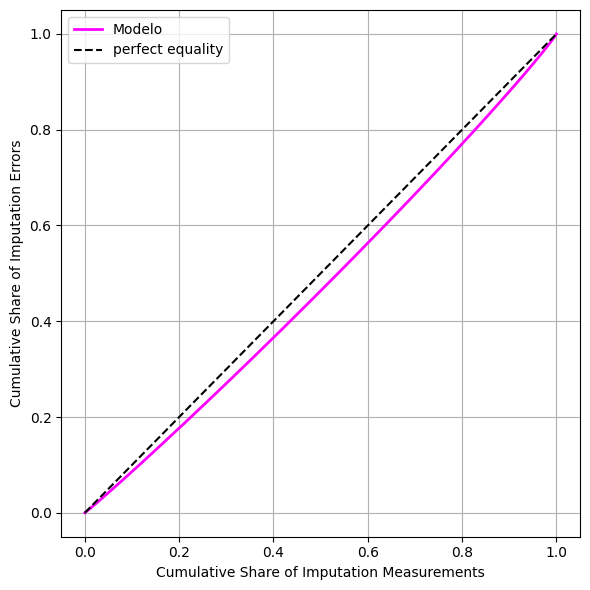

In [21]:
lorenz_curve_single(saits_ae_sum)

In [22]:
def lorenz_curve_double(X1, X2, labels=("SAITS", "BRITS"), colors=("magenta", "teal")):
    fig, ax = plt.subplots(figsize=[6,6])

    # --- Primeira curva ---
    X1 = np.sort(X1)
    X1_lorenz = X1.cumsum() / X1.sum()
    X1_lorenz = np.insert(X1_lorenz, 0, 0)
    x_vals1 = np.linspace(0, 1, len(X1_lorenz))
    ax.plot(x_vals1, X1_lorenz, linewidth=2, label=labels[0], color=colors[0])

    # --- Segunda curva ---
    X2 = np.sort(X2)
    X2_lorenz = X2.cumsum() / X2.sum()
    X2_lorenz = np.insert(X2_lorenz, 0, 0)
    x_vals2 = np.linspace(0, 1, len(X2_lorenz))
    ax.plot(x_vals2, X2_lorenz, linewidth=2, label=labels[1], color=colors[1])

    # Linha de igualdade (diagonal)
    ax.plot([0, 1], [0, 1], color='black', linestyle='--', label='perfect equality')

    ax.set_xlabel("Cumulative Share of Patients")
    ax.set_ylabel("Cumulative Share of Imputation Errors")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()


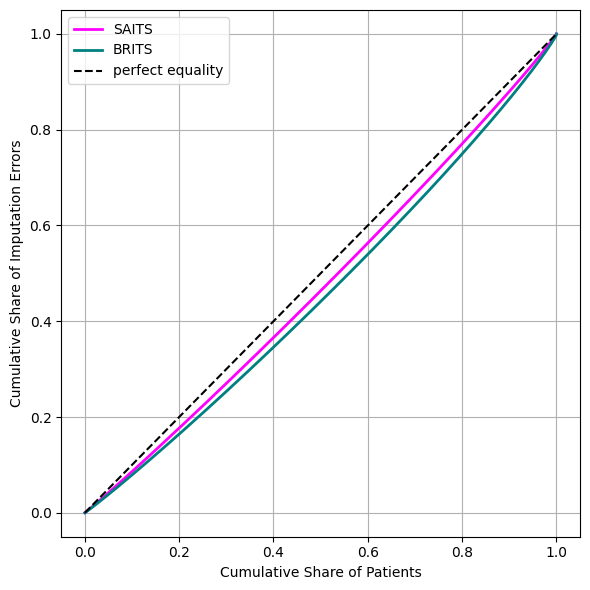

In [23]:
lorenz_curve_double(saits_ae_sum, brits_ae_sum)

In [15]:
teste = "teste"